## Import related functions

In [1]:
import sys
sys.path.append(r'./script/')
from get_dataset_and_analysis import *

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Get data from  xml

In [2]:
#  !gunzip -c ./basic_data/uniprot_sprot.xml.gz > ./basic_data/uniprot_sprot_xml // gunzip xml file 

#  analysis_uniprot_xml(xml_file, uniprot_data_file) //Anlysis data from xml and save data(uniprot_sprot_data.feather)

#  get_dataset_from_uniprot(uniprot_data, dataset_outfile) // Anlysis subunit label and save data(Dataset_0724_new.csv)


### Input and output file

In [3]:
# mkdir data_folder & figures_folder
data_folder = "./DATA"
figures_folder = os.path.join(data_folder, "figures")

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

In [4]:
subunit_num_distribution_png = os.path.join(data_folder, "figures", "subunit_num_distribution_reviewed_0725.png")
label_length_distribution_png = os.path.join(data_folder, "figures", "label_length_distribution_reviewed_0725.png")

ec_subunit_num_ratio_png = os.path.join(data_folder, "figures", "ec_subunit_num_ratio_0725.png")
ec_subunit_num_heatmap_png = os.path.join(data_folder, "figures", "ec_subunit_num_heatmap_0725.png")
distribution_among_species_png = os.path.join(data_folder, "figures", "distribution_among_species_0725.png")

dataset_file = os.path.join(data_folder, "Dataset_0724_new.csv")


### Load data

In [5]:
dataset = pd.read_csv(dataset_file)

### Dataset distribution

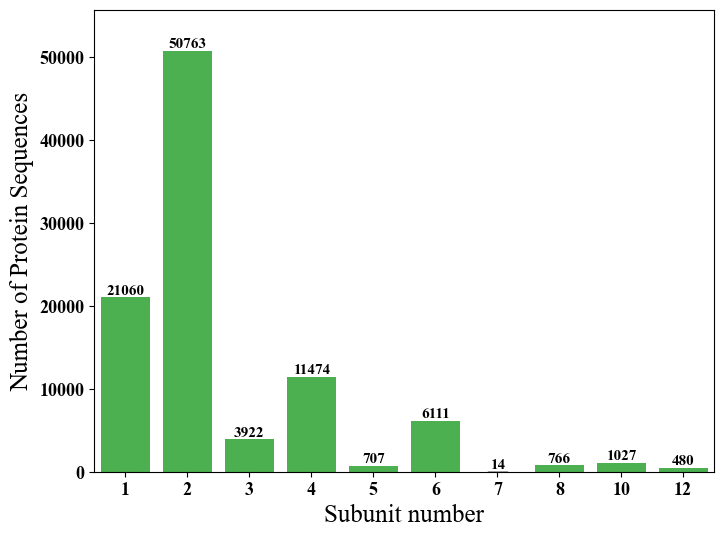

In [6]:
get_dataset_distribution(dataset, subunit_num_distribution_png)

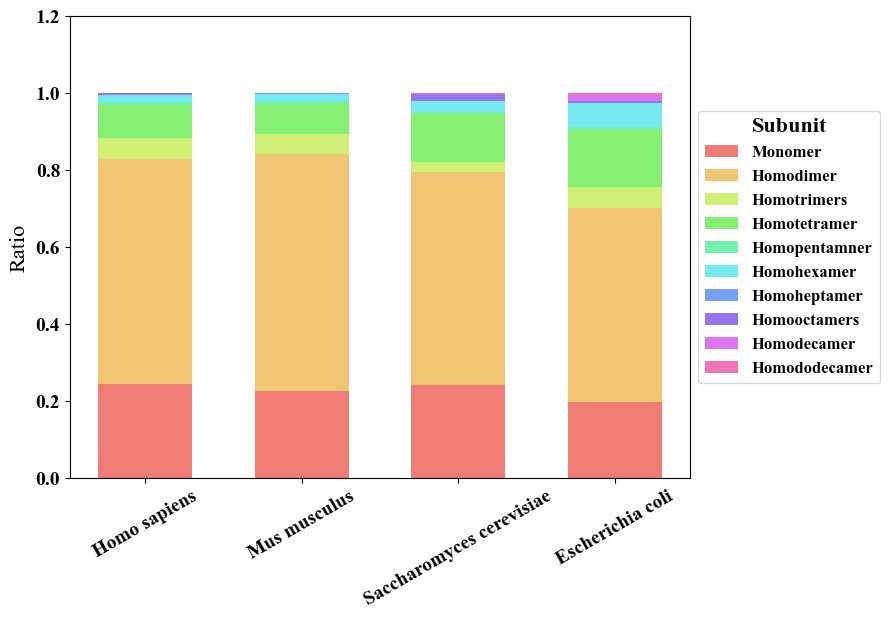

In [7]:
get_distribution_among_species(dataset,distribution_among_species_png) # 物种百分比

In [8]:
dataset

,Entry,Sequence,label,organism,EC number
0,P61981,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,2,Homo sapiens (Human),NaN
1,P31947,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,2,Homo sapiens (Human),NaN
2,Q7NXD4,MANIDLHFHSRTSDGALTPTEVIDRAAARAPALLALTDHDCTGGLA...,1,Chromobacterium violaceum (strain ATCC 12472 /...,3.1.3.97
3,B0XQT1,MGKSILLINGPNLNLLGTREPHIYGNTTLADVEASCKAHAESLGAT...,12,Aspergillus fumigatus (strain CBS 144.89 / FGS...,4.2.1.10
4,B8NIM4,MGKSILLINGPNLNLLGTREPHIYGSTTLADVEASSKAHAASLGAT...,12,Aspergillus flavus (strain ATCC 200026 / FGSC ...,4.2.1.10
...,...,...,...,...,...
96319,Q9ULJ3,MEGLLHYINPAHAISLLSALNEERLKGQLCDVLLIVGDQKFRAHKN...,2,Homo sapiens (Human),NaN
96320,Q6XR72,MGRYSGKTCRLLFMLVLTVAFFVAELVSGYLGNSIALLSDSFNMLS...,2,Homo sapiens (Human),NaN
96321,Q07157,MSARAAAAKSTAMEETAIWEQHTVTLHRAPGFGFGIAISGGRDNPH...,2,Homo sapiens (Human),NaN
96322,Q9UDY2,MPVRGDRGFPPRRELSGWLRAPGMEELIWEQYTVTLQKDSKRGFGI...,2,Homo sapiens (Human),NaN


In [9]:
def generate_percentage_dataframe(ori_data):
    uniprot_data = ori_data[ori_data['organism'].notna()]

    species_list = ['Homo sapiens', 'Mus musculus', 'Saccharomyces cerevisiae', 'Escherichia coli']
    label_sequence = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]

    species_dict = {}
    for species in species_list:
        group_df = uniprot_data[uniprot_data['organism'].str.contains(species)].groupby('label')
        count_list = [0] * 10
        for i, df in group_df:
            index = label_sequence.index(i)
            count_list[index] = df.shape[0]
        species_dict[species] = count_list

    legend_labels = ['Monomer', 'Homodimer', 'Homotrimers', 'Homotetramer', 'Homopentamner', 'Homohexamer', 'Homoheptamer', 'Homooctamers', 'Homodecamer', 'Homododecamer']

    percentage_dict = {}
    for species in species_list:
        total_count = sum(species_dict[species])
        percentage_list = [count / total_count for count in species_dict[species]]
        percentage_dict[species] = percentage_list

    df = pd.DataFrame(percentage_dict, index=legend_labels)
    return df

# Assuming ori_data is the DataFrame used in the plotting code
# Call the function to generate the DataFrame
percentage_df = generate_percentage_dataframe(dataset)
percentage_df


,Homo sapiens,Mus musculus,Saccharomyces cerevisiae,Escherichia coli
Monomer,0.244137,0.225434,0.240838,0.196452
Homodimer,0.584486,0.616570,0.554974,0.506024
Homotrimers,0.053518,0.052023,0.026178,0.053046
Homotetramer,0.087192,0.077071,0.123037,0.148092
Homopentamner,0.007216,0.007707,0.005236,0.008199
Homohexamer,0.017438,0.019268,0.028796,0.062751
Homoheptamer,0.001804,0.001927,0.000000,0.000837
Homooctamers,0.003608,0.000000,0.018325,0.004016
Homodecamer,0.000601,0.000000,0.000000,0.016232
Homododecamer,0.000000,0.000000,0.002618,0.004351


### label-length

<Figure size 2400x1800 with 0 Axes>

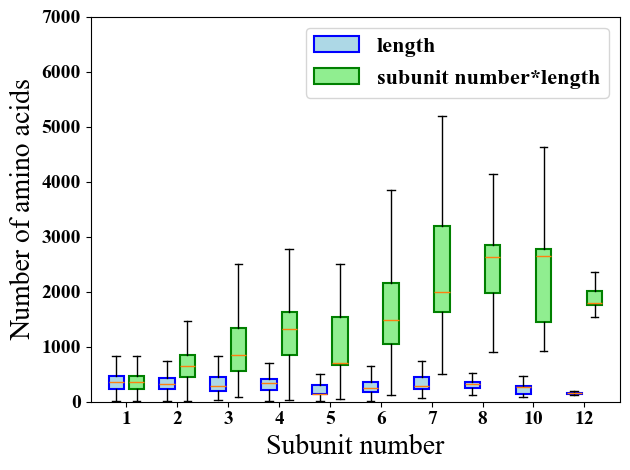

In [10]:
get_label_length_distribution(dataset, label_length_distribution_png)

### EC分布

In [11]:
dataset

,Entry,Sequence,label,organism,EC number
0,P61981,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,2,Homo sapiens (Human),NaN
1,P31947,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,2,Homo sapiens (Human),NaN
2,Q7NXD4,MANIDLHFHSRTSDGALTPTEVIDRAAARAPALLALTDHDCTGGLA...,1,Chromobacterium violaceum (strain ATCC 12472 /...,3.1.3.97
3,B0XQT1,MGKSILLINGPNLNLLGTREPHIYGNTTLADVEASCKAHAESLGAT...,12,Aspergillus fumigatus (strain CBS 144.89 / FGS...,4.2.1.10
4,B8NIM4,MGKSILLINGPNLNLLGTREPHIYGSTTLADVEASSKAHAASLGAT...,12,Aspergillus flavus (strain ATCC 200026 / FGSC ...,4.2.1.10
...,...,...,...,...,...
96319,Q9ULJ3,MEGLLHYINPAHAISLLSALNEERLKGQLCDVLLIVGDQKFRAHKN...,2,Homo sapiens (Human),NaN
96320,Q6XR72,MGRYSGKTCRLLFMLVLTVAFFVAELVSGYLGNSIALLSDSFNMLS...,2,Homo sapiens (Human),NaN
96321,Q07157,MSARAAAAKSTAMEETAIWEQHTVTLHRAPGFGFGIAISGGRDNPH...,2,Homo sapiens (Human),NaN
96322,Q9UDY2,MPVRGDRGFPPRRELSGWLRAPGMEELIWEQYTVTLQKDSKRGFGI...,2,Homo sapiens (Human),NaN


/home/linjw/BioML/reDeepSub/./script/get_dataset_and_analysis.py:457: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_data.rename(columns={'label': 'uniprot_label'}, inplace=True)


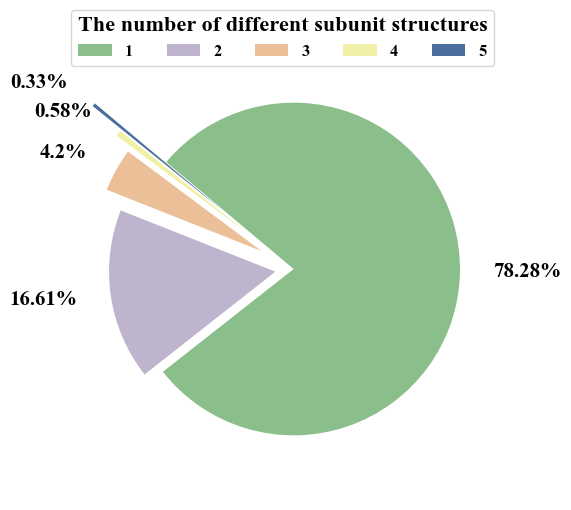

In [12]:
get_ec_subunit_num_ratio(dataset,ec_subunit_num_ratio_png)

In [13]:
import pandas as pd
data = pd.read_excel("2.xlsx")

In [14]:
data

,EC number,uniprot_label,length,uniprot_label_set,length_set
0,1.1.1.1,"[4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, ...",92,"[2, 4]",2
1,1.1.1.10,"[4, 4, 4, 4, 4, 4]",6,[4],1
2,1.1.1.100,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",12,[4],1
3,1.1.1.103,"[4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, ...",184,"[2, 4]",2
4,1.1.1.104,[4],1,[4],1
...,...,...,...,...,...
2735,7.5.2.3,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",23,[2],1
2736,7.5.2.5,[2],1,[2],1
2737,7.5.2.6,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",106,[2],1
2738,7.6.2.2,"[2, 2, 2]",3,[2],1


In [15]:
data['length_set'].value_counts()

length_set
1    2145
2     455
3     115
4      16
5       9
Name: count, dtype: int64

In [16]:
data[data['length_set']==5]

,EC number,uniprot_label,length,uniprot_label_set,length_set
437,1.15.1.1,"[2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 1, 2, 4, 4, 2, ...",126,"[1, 2, 3, 4, 6]",5
1186,2.5.1.41,"[2, 1, 4, 5, 6, 2, 6, 2, 6, 2, 4]",11,"[1, 2, 4, 5, 6]",5
1457,2.7.7.7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",217,"[1, 2, 3, 4, 6]",5
1725,3.2.1.21,"[2, 2, 4, 4, 6, 2, 1, 1, 8, 1, 2, 2]",12,"[1, 2, 4, 6, 8]",5
1809,3.4.11.5,"[1, 1, 6, 6, 4, 1, 3, 2]",8,"[1, 2, 3, 4, 6]",5
1946,3.5.1.4,"[4, 6, 4, 2, 8, 1]",6,"[1, 2, 4, 6, 8]",5
2045,3.6.1.1,"[1, 1, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",116,"[1, 2, 3, 6, 12]",5
2050,3.6.1.15,"[2, 2, 12, 1, 1, 6, 2, 2, 2, 4, 1, 1, 4, 2, 2, 2]",16,"[1, 2, 4, 6, 12]",5
2235,4.2.1.1,"[3, 2, 4, 3, 2, 2, 1, 6, 6, 6, 2, 4, 6]",13,"[1, 2, 3, 4, 6]",5


/home/linjw/BioML/reDeepSub/./script/get_dataset_and_analysis.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_data.rename(columns={'label': 'uniprot_label'}, inplace=True)


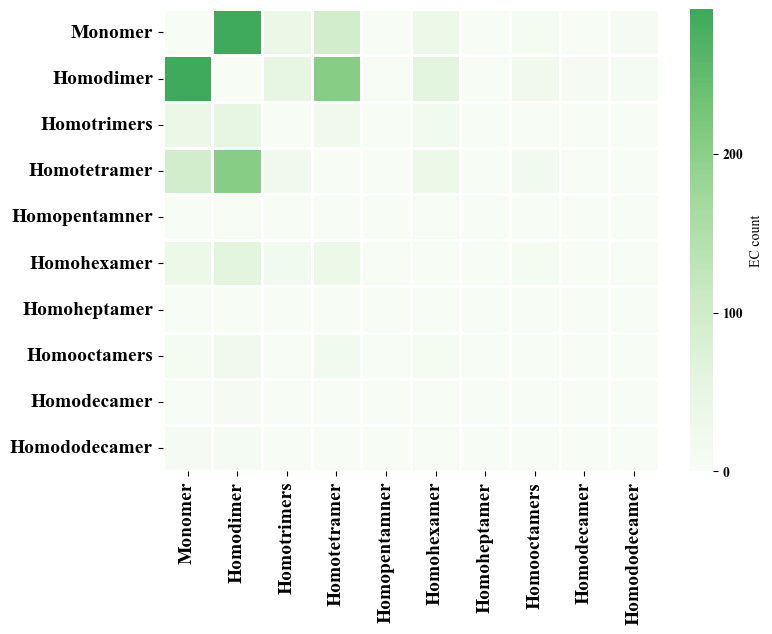

In [17]:
get_ec_subunit_num_heatmap(dataset,ec_subunit_num_heatmap_png)